https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr?resource=download

In [39]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from numpy.lib.function_base import vectorize
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [25]:
resume = pd.read_csv("data/imdb-reviews-pt-br.csv")
resume.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [26]:

train, test, class_train, class_test = train_test_split(resume.text_pt, 
                                                              resume.sentiment,
                                                              random_state=42)
"""regression = LogisticRegression()
regression.fit(treino, classe_treino)
acuracia = regression.score(teste, classe_teste)
print(acuracia)

Essa parte do código da erro como exemplo.
"""

'regression = LogisticRegression()\nregression.fit(treino, classe_treino)\nacuracia = regression.score(teste, classe_teste)\nprint(acuracia)\n\nEssa parte do código da erro como exemplo.\n'

In [27]:
classiofication = resume["sentiment"].replace(["neg","pos"], [0,1])
classiofication

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [28]:
resume["classificacao"] = classiofication
resume.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [29]:
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vectorize = CountVectorizer(lowercase=False)

bag_of_words = vectorize.fit_transform(texto)

In [30]:
vectorize.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [31]:
vectorize = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorize.fit_transform(resume.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [32]:
def classify_text(text, column_text, column_classification):
  vectorize = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vectorize.fit_transform(text[column_text])
  train, test, class_train, class_test = train_test_split(bag_of_words, 
                                                              text[column_classification],
                                                              random_state=42)
  
  regression = LogisticRegression()
  regression.fit(train, class_train)
  return regression.score(test, class_test)
   
print(classify_text(resume, "text_pt","classificacao"))


0.6583097452486858


#4 Word Cloud

In [33]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([texto for texto in resume.text_pt])

wordcloud = WordCloud(width=800, height=500,
                      max_font_size=110,
                      collocations=False).generate(all_words)


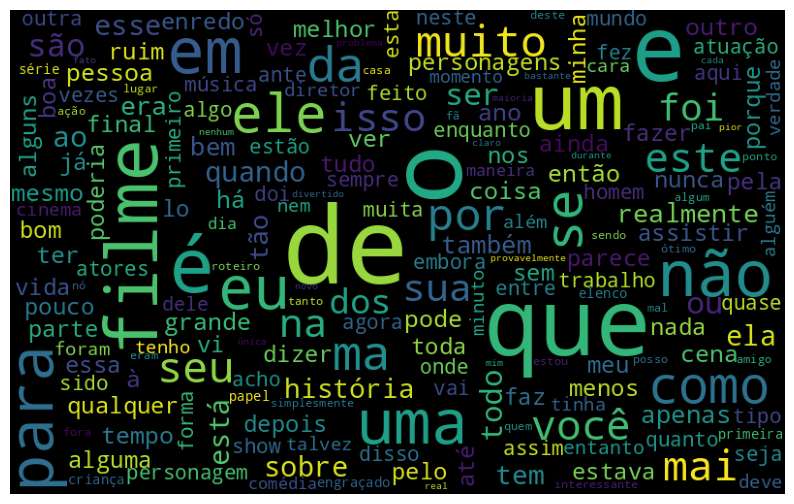

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, )
plt.axis("off")
plt.show()




In [35]:
resume.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [36]:
def word_cloud_neg(text, column_text):
  text_neg = text.query("sentiment == 'neg'")
  all_words = ' '.join([texto for texto in text_neg[column_text]])
  wordcloud = WordCloud(width=800, height=500,
                        max_font_size=110,
                        collocations=False).generate(all_words)
                        
  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud, )
  plt.axis("off")
  plt.show()

def word_cloud_pos(text, column_text):
  text_pos = text.query("sentiment == 'pos'")
  all_words = ' '.join([texto for texto in text_pos[column_text]])
  wordcloud = WordCloud(width=800, height=500,
                        max_font_size=110,
                        collocations=False).generate(all_words)
                        
  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud, )
  plt.axis("off")
  plt.show()


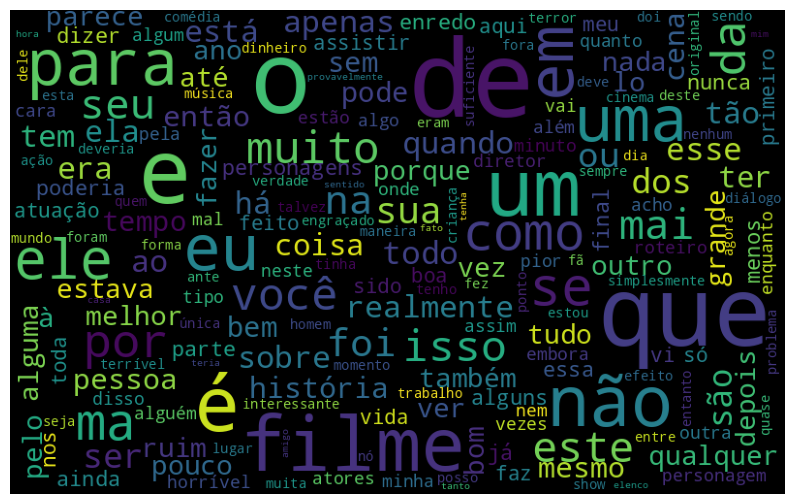

In [37]:
word_cloud_neg(resume, "text_pt")

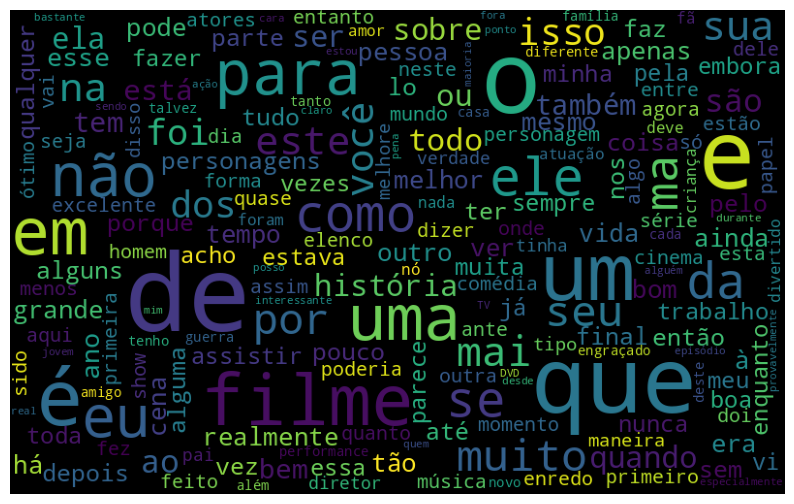

In [38]:
word_cloud_pos(resume, "text_pt")

In [43]:
texto = ["um filme bom","um filme ruim"]
frequency = nltk.FreqDist(texto)
frequency

In [47]:
from nltk import tokenize

texto = "um filme bom um filme ruim"
token_space = tokenize.WhitespaceTokenizer()
token_phrase = token_space.tokenize(texto)
token_phrase

['um', 'filme', 'bom', 'um', 'filme', 'ruim']

In [56]:
token_phrase = token_space.tokenize(all_words)
frequency = nltk.FreqDist(token_phrase)
df_freq = pd.DataFrame({"Word": list(frequency.keys()),
                        "Frequency": list(frequency.values())})
nlarge = df_freq.nlargest(columns="Frequency", n=10)

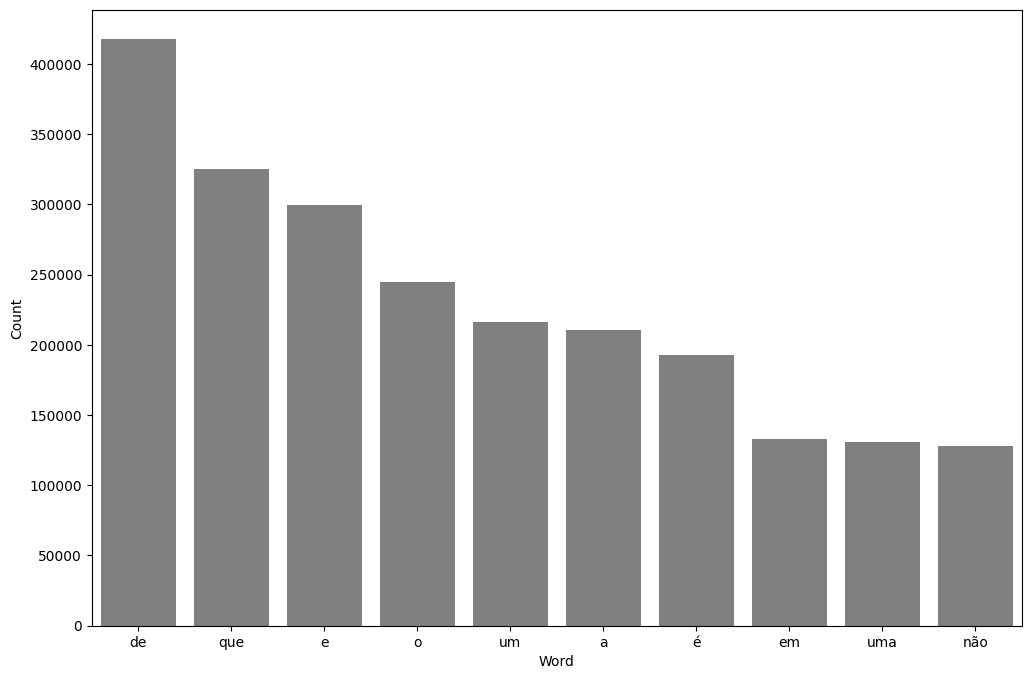

In [62]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data = nlarge, x = "Word", y = "Frequency", color="gray")
ax.set(ylabel = "Count")
plt.show()


In [64]:
def pareto_bar(text, cloumn_text,quantity):

  all_words = ' '.join([text for text in text[cloumn_text]])
  token_phrase = token_space.tokenize(all_words)
  frequency = nltk.FreqDist(token_phrase)
  df_freq = pd.DataFrame({"Word": list(frequency.keys()),
                        "Frequency": list(frequency.values())})
  nlarge = df_freq.nlargest(columns="Frequency", n=quantity)
  plt.figure(figsize=(12,8))
  ax = sns.barplot(data = nlarge, x = "Word", y = "Frequency", color="gray")
  ax.set(ylabel = "Count")
  plt.show()


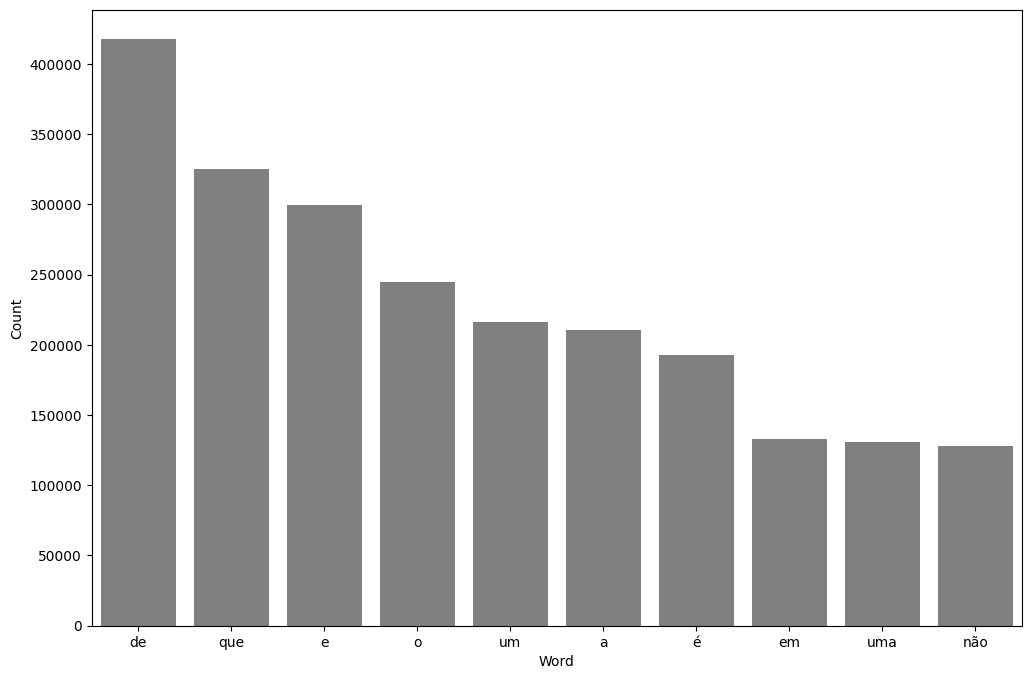

In [65]:
pareto_bar(resume, "text_pt", 10)

In [66]:
stop_words = nltk.corpus.stopwords.words("portuguese")
processed_phrase = list()

for opinion in resume.text_pt:
  new_phrase = list()
  text_words = token_space.tokenize(opinion)
  for word in text_words:
    if word not in stop_words:
      new_phrase.append(word)
  processed_phrase.append(' '.join(new_phrase))

resume["tratamento_1"] = processed_phrase

In [67]:
resume.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [69]:
classify_text(resume,"tratamento_1","classificacao")

0.6811160533764659

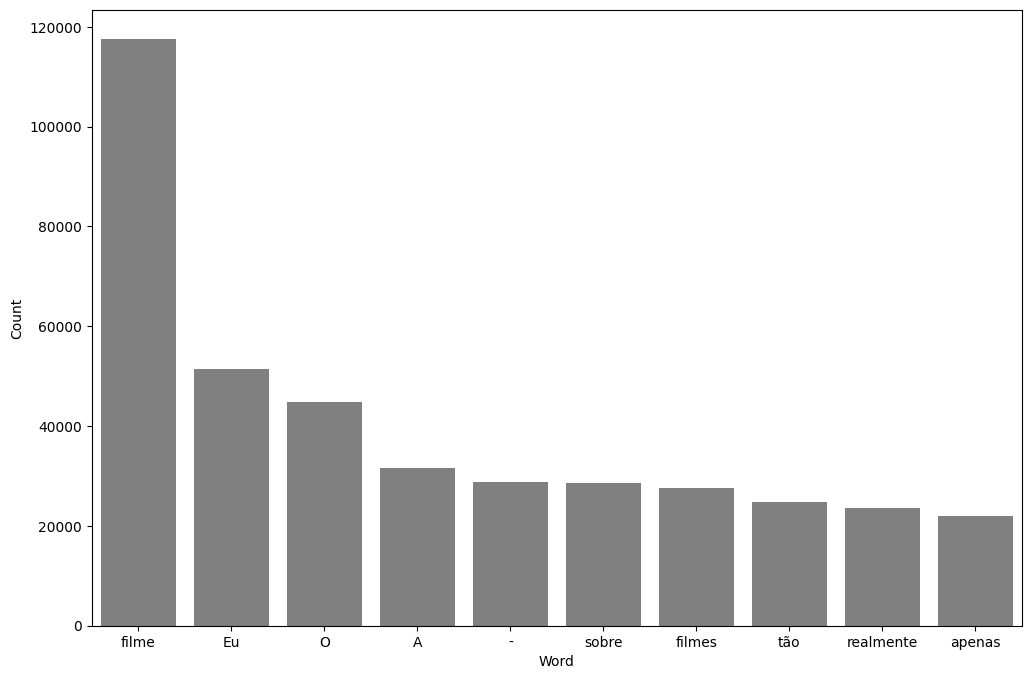

In [70]:
pareto_bar(resume, "tratamento_1",10)

#Work in progress